In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Loading the data

In [2]:
loan = pd.read_csv("loan.csv")

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Explore the data

In [3]:
loan.shape

(887379, 74)

In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
887374,36371250,39102635,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN
887375,36441262,39152692,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN
887376,36271333,38982739,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN
887377,36490806,39222577,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN
887378,36271262,38982659,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN


In [6]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [9]:
loan = loan.loc[ : , ["loan_amnt", "term", "int_rate", "grade", "sub_grade", "emp_length", "home_ownership", 
                     "annual_inc", "verification_status", "loan_status", "dti", "delinq_2yrs", "inq_last_6mths", 
                     "revol_bal", "revol_util","issue_d"]]

In [10]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
loan_amnt              887379 non-null float64
term                   887379 non-null object
int_rate               887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
emp_length             887379 non-null object
home_ownership         887379 non-null object
annual_inc             887375 non-null float64
verification_status    887379 non-null object
loan_status            887379 non-null object
dti                    887379 non-null float64
delinq_2yrs            887350 non-null float64
inq_last_6mths         887350 non-null float64
revol_bal              887379 non-null float64
revol_util             886877 non-null float64
dtypes: float64(8), object(7)
memory usage: 101.6+ MB


In [12]:
loan.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
grade                    0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               4
verification_status      0
loan_status              0
dti                      0
delinq_2yrs             29
inq_last_6mths          29
revol_bal                0
revol_util             502
dtype: int64

In [13]:
loan.annual_inc.fillna(loan.annual_inc.median(), inplace=True)

In [14]:
loan.delinq_2yrs.fillna(loan.delinq_2yrs.median(), inplace=True)

In [15]:
loan.inq_last_6mths.fillna(loan.inq_last_6mths.median(), inplace=True)

In [16]:
loan.revol_util.fillna(loan.revol_util.median(), inplace=True)

In [17]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
loan_amnt              887379 non-null float64
term                   887379 non-null object
int_rate               887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
emp_length             887379 non-null object
home_ownership         887379 non-null object
annual_inc             887379 non-null float64
verification_status    887379 non-null object
loan_status            887379 non-null object
dti                    887379 non-null float64
delinq_2yrs            887379 non-null float64
inq_last_6mths         887379 non-null float64
revol_bal              887379 non-null float64
revol_util             887379 non-null float64
dtypes: float64(8), object(7)
memory usage: 101.6+ MB


In [18]:
loan.loan_amnt.describe()

count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


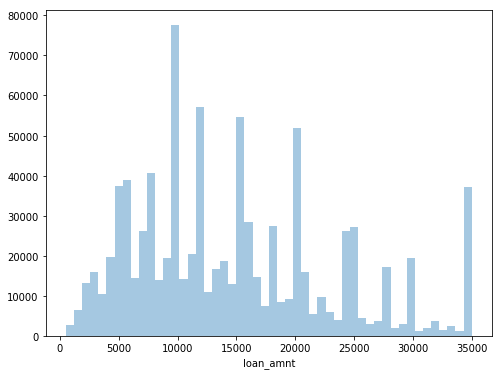

In [20]:
plt.figure(figsize=(8,6))
sns.distplot(loan.loan_amnt, kde=False)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


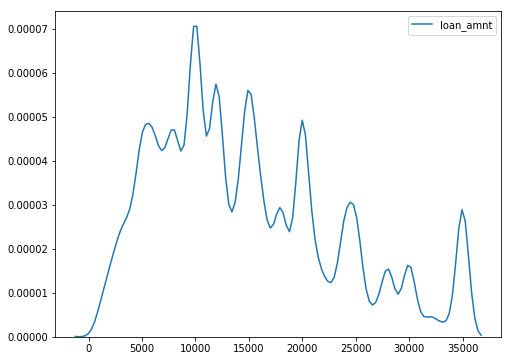

In [22]:
plt.figure(figsize=(8,6))
sns.kdeplot(loan.loan_amnt)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


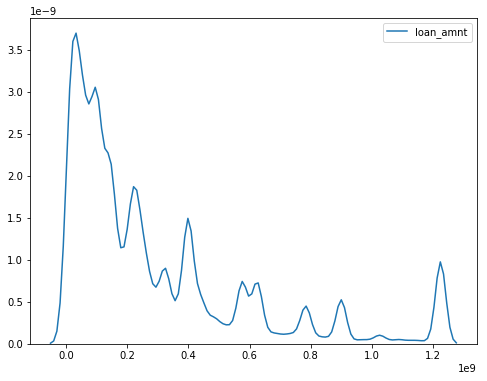

In [26]:
plt.figure(figsize=(8,6))
sns.kdeplot(np.power(loan.loan_amnt, 2))

In [27]:
temp_var = pd.cut(loan.loan_amnt, [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000])

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

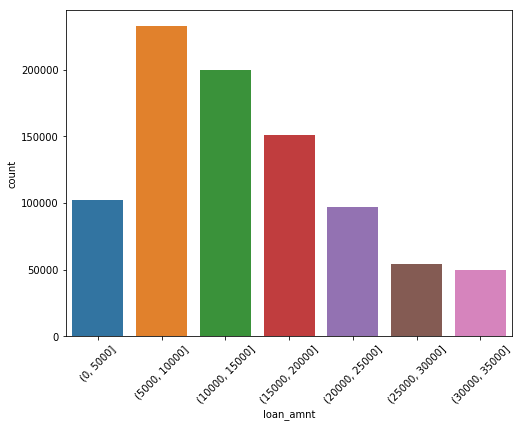

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(temp_var)
plt.xticks(rotation=45)

In [40]:
loan.term.value_counts()

 36 months    621125
 60 months    266254
Name: term, dtype: int64

In [45]:
np.round(loan.term.value_counts()/loan.shape[0] * 100, 2)

 36 months    70.0
 60 months    30.0
Name: term, dtype: float64

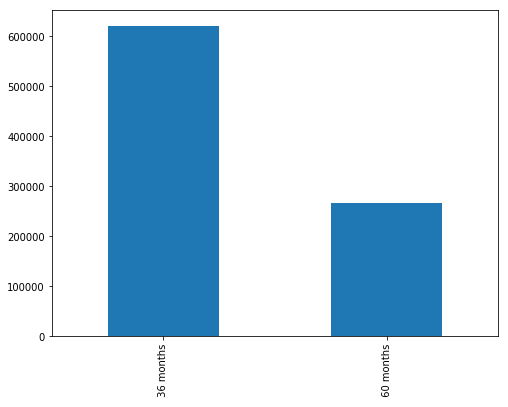

In [47]:
plt.figure(figsize=(8,6))
loan.term.value_counts().plot(kind = "bar")

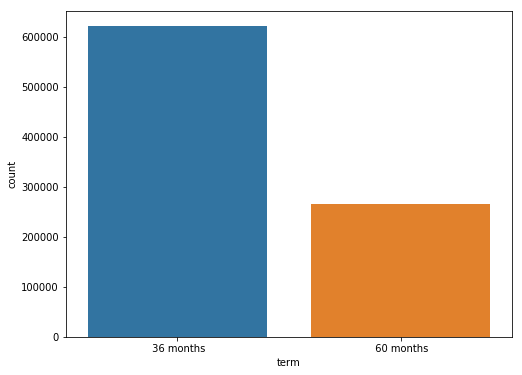

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(loan.term)

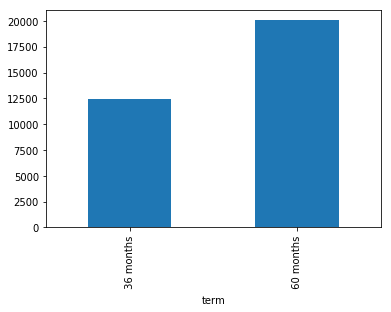

In [52]:
loan.groupby('term')["loan_amnt"].mean().plot(kind = "bar")

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


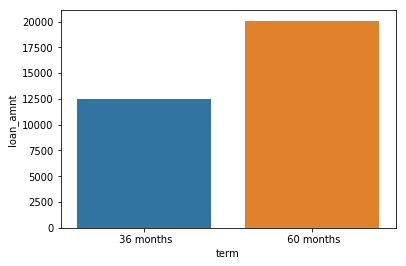

In [53]:
sns.barplot(x = "term", y = "loan_amnt", data = loan)

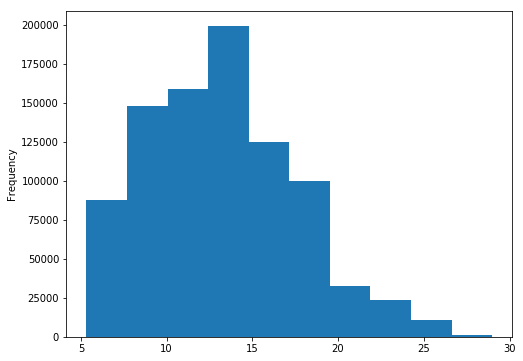

In [55]:
plt.figure(figsize=(8,6))
loan.int_rate.plot(kind = "hist")

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


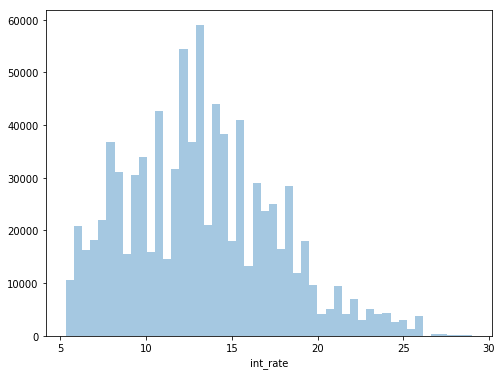

In [56]:
plt.figure(figsize=(8,6))
sns.distplot(loan.int_rate, kde = False)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


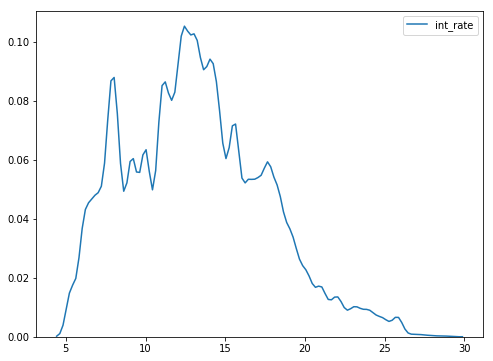

In [58]:
plt.figure(figsize=(8,6))
sns.kdeplot(loan.int_rate)

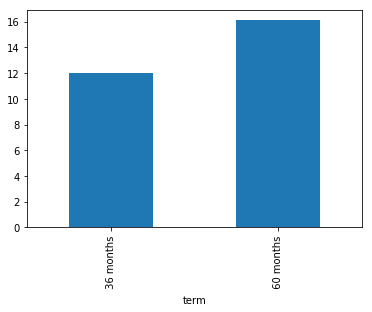

In [59]:
loan.groupby('term')["int_rate"].mean().plot(kind = "bar")

In [60]:
loan.groupby('term')["int_rate"].mean()

term
 36 months    12.018678
 60 months    16.111596
Name: int_rate, dtype: float64

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


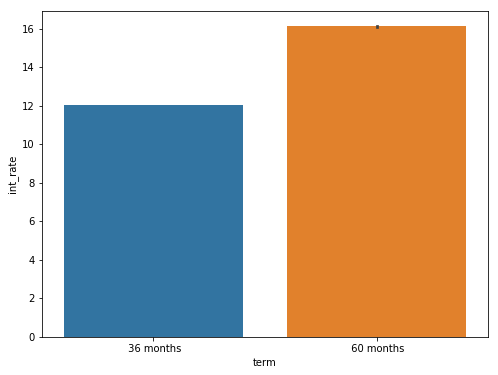

In [61]:
plt.figure(figsize=(8,6))
sns.barplot(x = "term", y = "int_rate", data = loan)

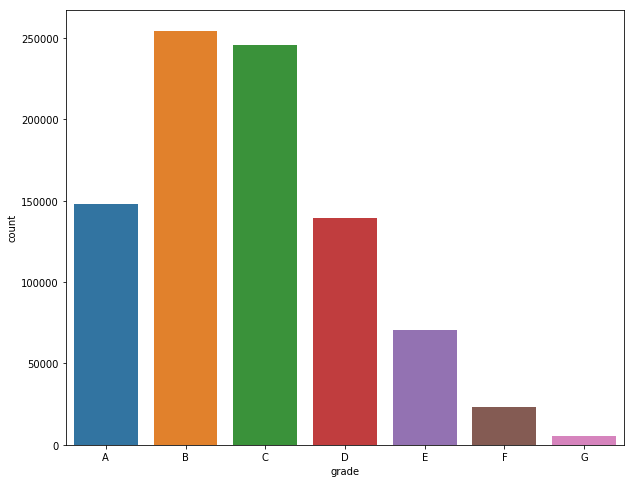

In [64]:
plt.figure(figsize=(10,8))
sns.countplot(loan.grade, order=["A", "B", "C", "D", "E", "F", "G"])

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


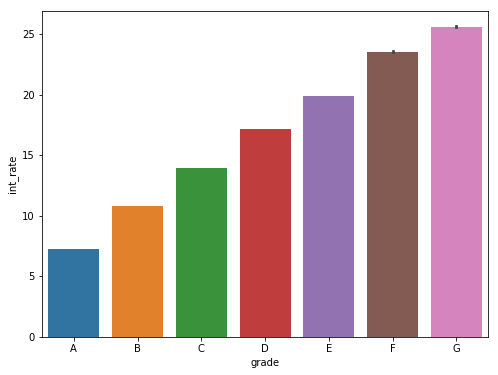

In [66]:
plt.figure(figsize=(8,6))
sns.barplot(x = "grade", y = "int_rate", data = loan, order=["A", "B", "C", "D", "E", "F", "G"])

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


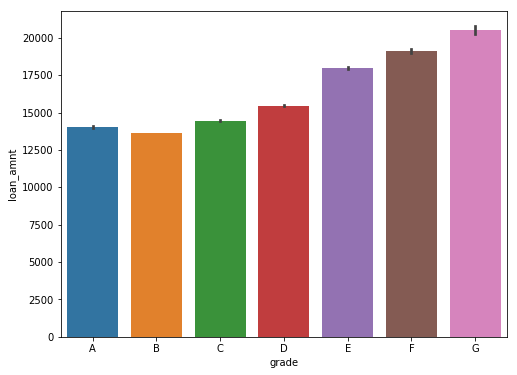

In [67]:
plt.figure(figsize=(8,6))
sns.barplot(x = "grade", y = "loan_amnt", data = loan, order=["A", "B", "C", "D", "E", "F", "G"])

In [68]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
loan_amnt              887379 non-null float64
term                   887379 non-null object
int_rate               887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
emp_length             887379 non-null object
home_ownership         887379 non-null object
annual_inc             887379 non-null float64
verification_status    887379 non-null object
loan_status            887379 non-null object
dti                    887379 non-null float64
delinq_2yrs            887379 non-null float64
inq_last_6mths         887379 non-null float64
revol_bal              887379 non-null float64
revol_util             887379 non-null float64
dtypes: float64(8), object(7)
memory usage: 101.6+ MB


In [70]:
loan.pivot_table(values='int_rate', index='grade', columns='term', aggfunc=np.count_nonzero)

term,36 months,60 months
grade,,
A,143015.0,5187.0
B,212009.0,42526.0
C,162420.0,83440.0
D,76687.0,62855.0
E,21842.0,48863.0
F,4466.0,18580.0
G,686.0,4803.0


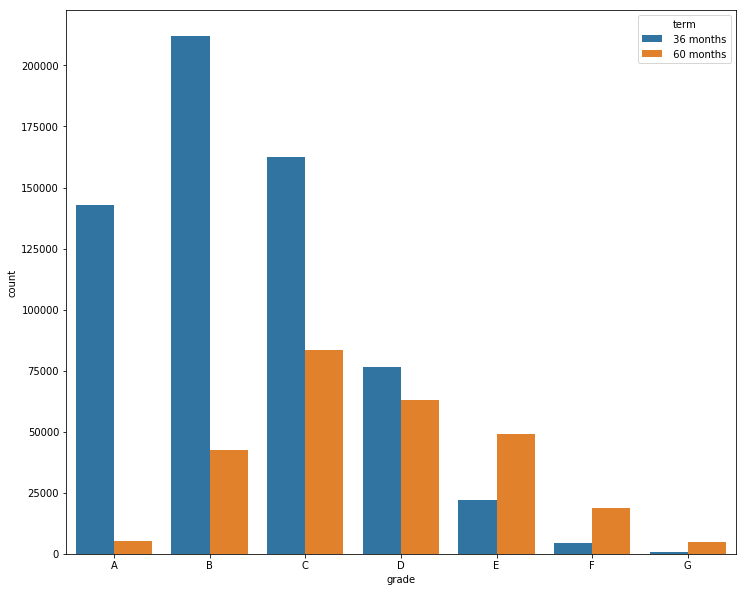

In [73]:
plt.figure(figsize=(12,10))
sns.countplot(loan.grade, hue = loan.term, order=["A", "B","C", "D", "E", "F", "G"])

In [74]:
loan_A = loan.loc[loan.grade == "A", :]

In [75]:
loan_A.sub_grade.value_counts()

A5    44816
A4    34531
A3    23457
A1    22913
A2    22485
Name: sub_grade, dtype: int64

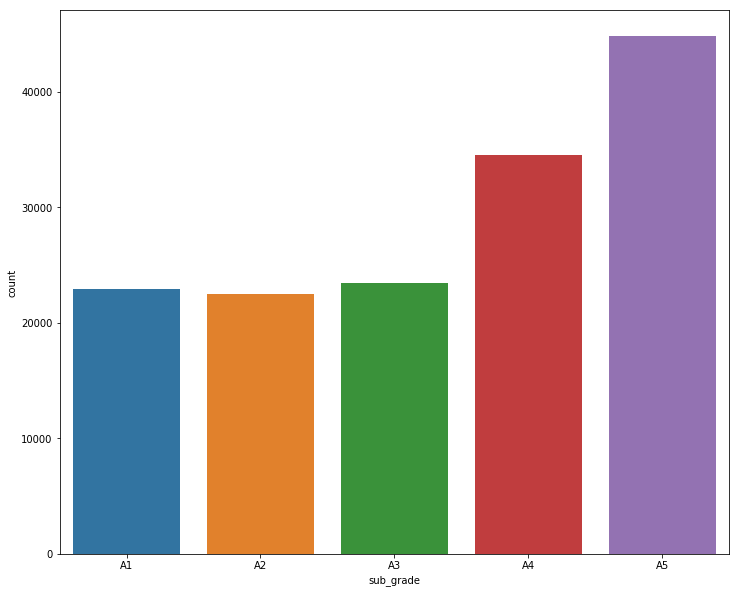

In [77]:
plt.figure(figsize=(12,10))
sns.countplot(loan_A.sub_grade, order=["A1", "A2", "A3", "A4", "A5"])

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


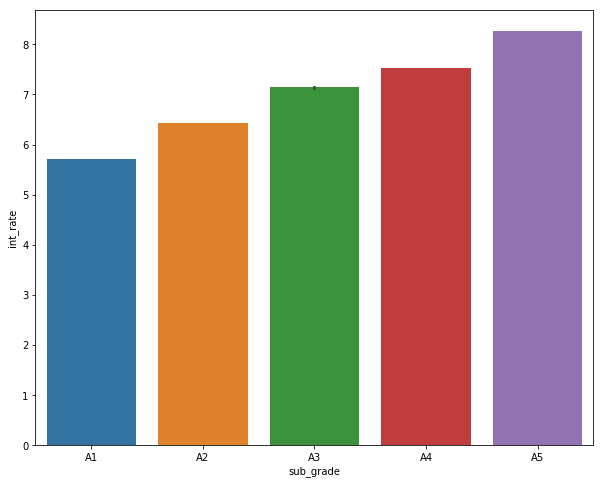

In [78]:
plt.figure(figsize=(10,8))
sns.barplot(x = "sub_grade", y = "int_rate", data = loan_A, order=["A1", "A2", "A3", "A4", "A5"])

In [79]:
loan.home_ownership.value_counts()

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

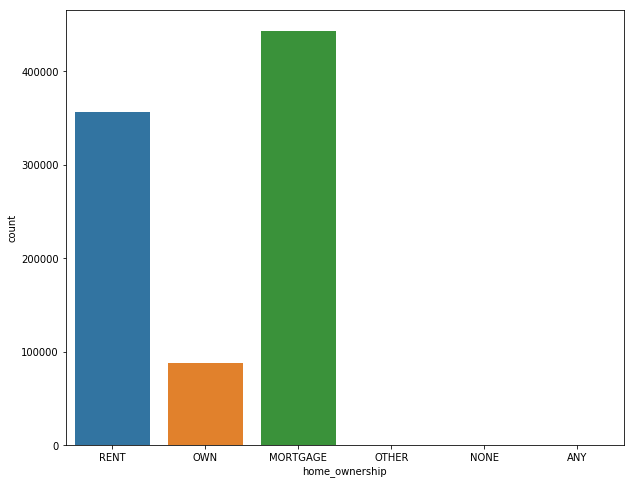

In [80]:
plt.figure(figsize=(10,8))
sns.countplot(loan.home_ownership)

In [81]:
loan.home_ownership = np.where(loan.home_ownership.isin(["OTHER", "NONE", "ANY"]), "MORTGAGE", loan.home_ownership)

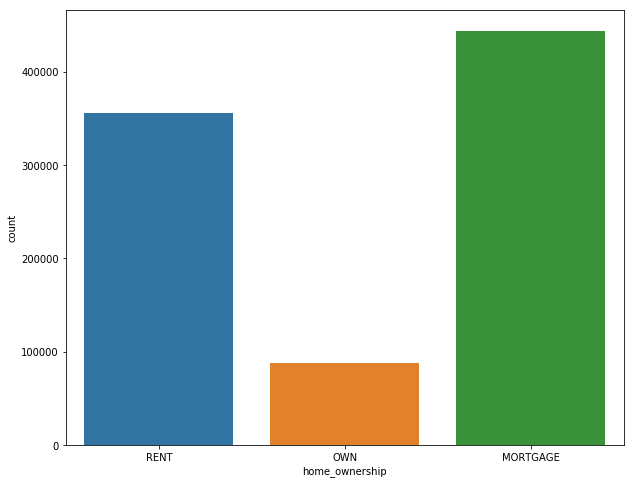

In [82]:
plt.figure(figsize=(10,8))
sns.countplot(loan.home_ownership)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


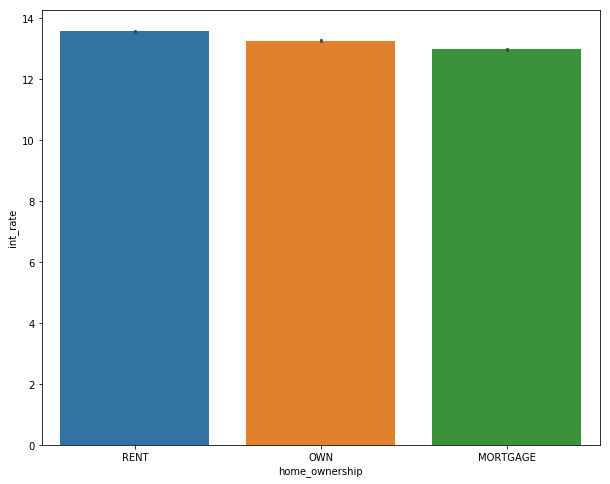

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x = "home_ownership", y = "int_rate", data = loan)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


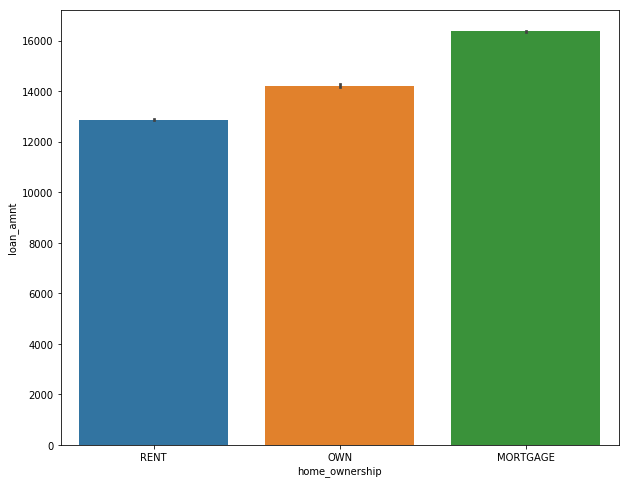

In [84]:
plt.figure(figsize=(10,8))
sns.barplot(x = "home_ownership", y = "loan_amnt", data = loan)

In [85]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
loan_amnt              887379 non-null float64
term                   887379 non-null object
int_rate               887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
emp_length             887379 non-null object
home_ownership         887379 non-null object
annual_inc             887379 non-null float64
verification_status    887379 non-null object
loan_status            887379 non-null object
dti                    887379 non-null float64
delinq_2yrs            887379 non-null float64
inq_last_6mths         887379 non-null float64
revol_bal              887379 non-null float64
revol_util             887379 non-null float64
dtypes: float64(8), object(7)
memory usage: 101.6+ MB


In [86]:
loan.annual_inc.describe()

count    8.873790e+05
mean     7.502754e+04
std      6.469816e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.000000e+04
max      9.500000e+06
Name: annual_inc, dtype: float64

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


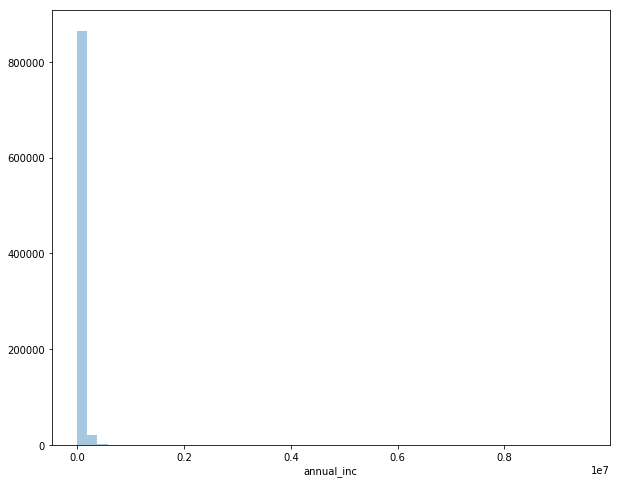

In [88]:
plt.figure(figsize=(10,8))
sns.distplot(loan.annual_inc, kde = False)

In [90]:
loan.annual_inc.quantile(0.95)

150000.0

In [91]:
loan.annual_inc = np.where(loan.annual_inc > 150000, 150000, loan.annual_inc)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


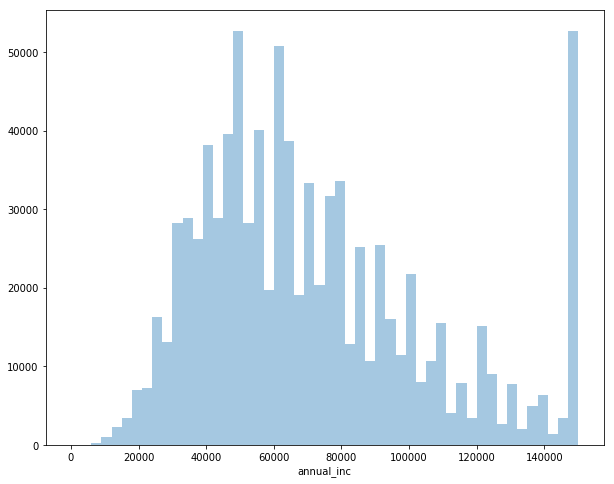

In [92]:
plt.figure(figsize=(10,8))
sns.distplot(loan.annual_inc, kde = False)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


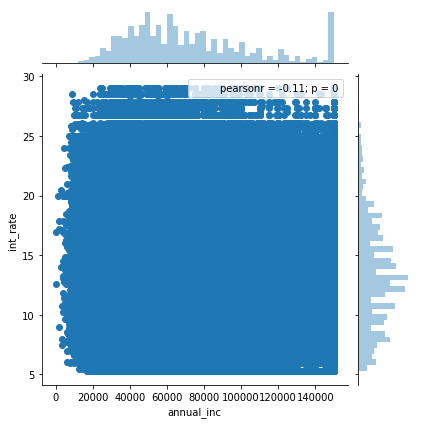

In [93]:
plt.figure(figsize=(10,8))
sns.jointplot(x = "annual_inc", y = "int_rate", data = loan)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


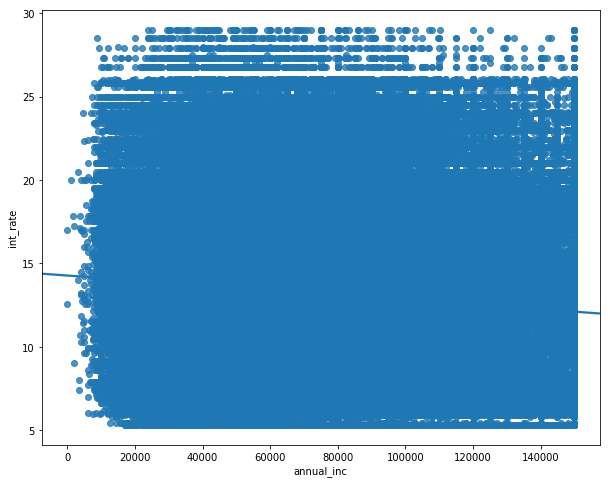

In [94]:
plt.figure(figsize=(10,8))
sns.regplot(x = "annual_inc", y = "int_rate", data = loan)

In [95]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
loan_amnt              887379 non-null float64
term                   887379 non-null object
int_rate               887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
emp_length             887379 non-null object
home_ownership         887379 non-null object
annual_inc             887379 non-null float64
verification_status    887379 non-null object
loan_status            887379 non-null object
dti                    887379 non-null float64
delinq_2yrs            887379 non-null float64
inq_last_6mths         887379 non-null float64
revol_bal              887379 non-null float64
revol_util             887379 non-null float64
dtypes: float64(8), object(7)
memory usage: 101.6+ MB


/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


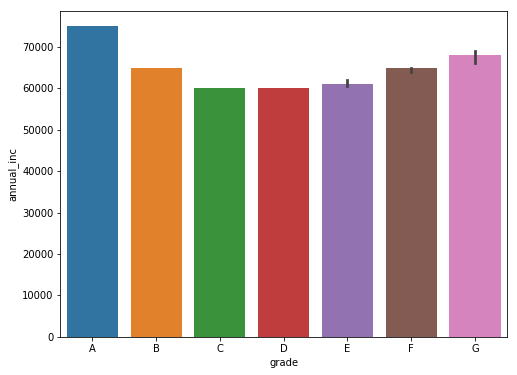

In [97]:
plt.figure(figsize=(8,6))
sns.barplot(x = "grade", y = "annual_inc", data = loan, order=["A", "B", "C", "D", "E", "F", "G"], 
            estimator=np.median)

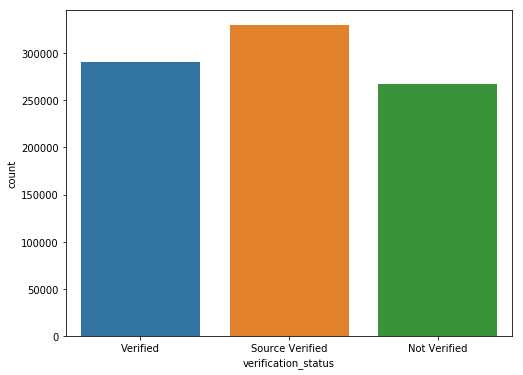

In [98]:
plt.figure(figsize=(8,6))
sns.countplot(loan.verification_status)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


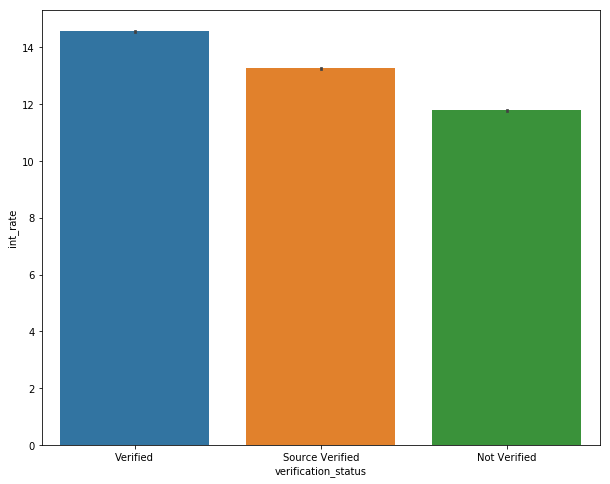

In [99]:
plt.figure(figsize=(10,8))
sns.barplot(x = "verification_status", y = "int_rate", data = loan)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

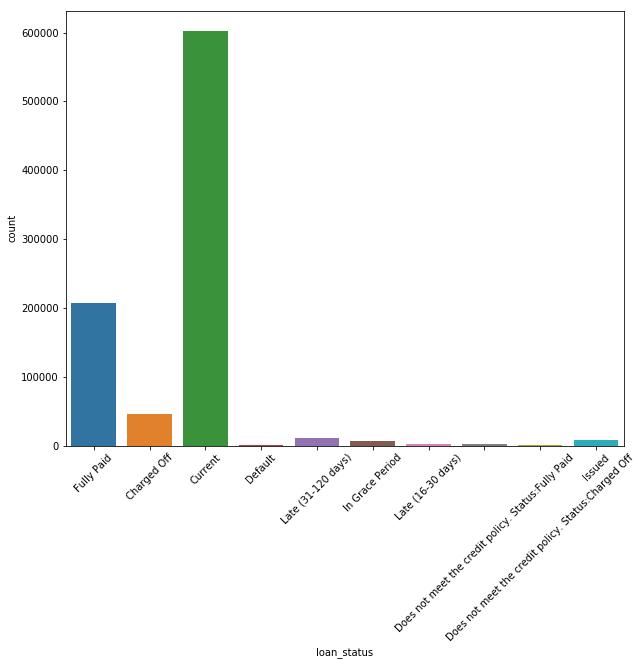

In [101]:
plt.figure(figsize=(10,8))
sns.countplot(loan.loan_status)
plt.xticks(rotation=45)

In [102]:
loan.loan_status = np.where(loan.loan_status.isin(["Fully Paid", "Current"]), "Good", "Bad")

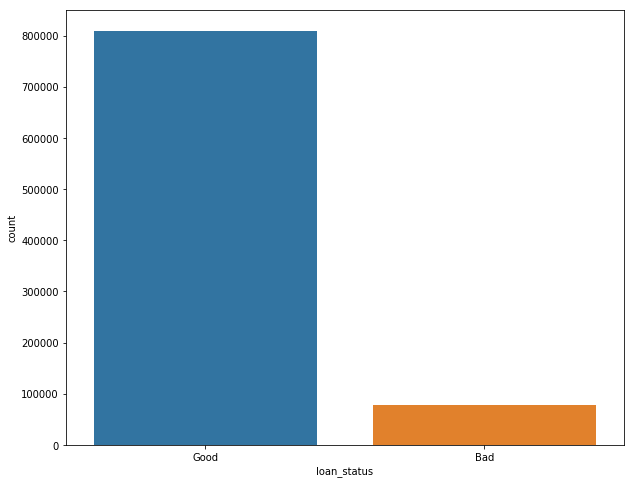

In [103]:
plt.figure(figsize=(10,8))
sns.countplot(loan.loan_status)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


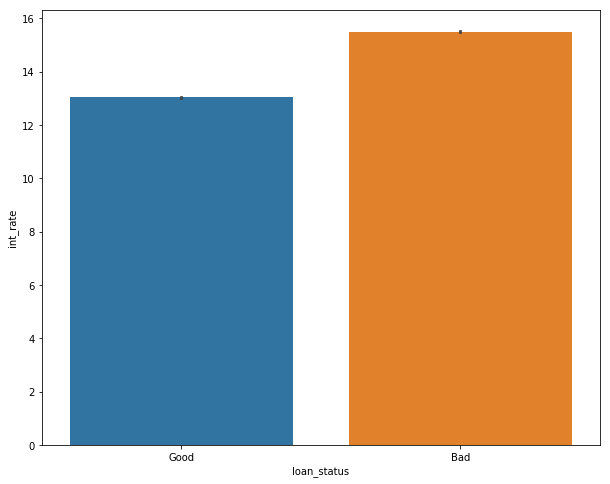

In [104]:
plt.figure(figsize=(10,8))
sns.barplot(x = "loan_status", y = "int_rate", data = loan)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


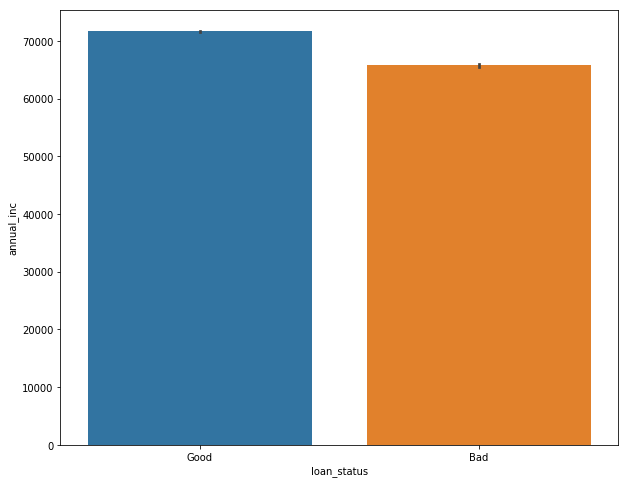

In [105]:
plt.figure(figsize=(10,8))
sns.barplot(x = "loan_status", y = "annual_inc", data = loan)

/Users/RaviPandey/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


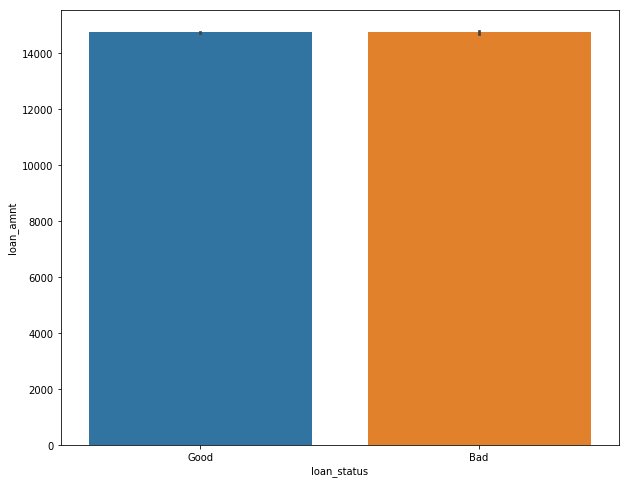

In [107]:
plt.figure(figsize=(10,8))
sns.barplot(x = "loan_status", y = "loan_amnt", data = loan)

In [108]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 15 columns):
loan_amnt              887379 non-null float64
term                   887379 non-null object
int_rate               887379 non-null float64
grade                  887379 non-null object
sub_grade              887379 non-null object
emp_length             887379 non-null object
home_ownership         887379 non-null object
annual_inc             887379 non-null float64
verification_status    887379 non-null object
loan_status            887379 non-null object
dti                    887379 non-null float64
delinq_2yrs            887379 non-null float64
inq_last_6mths         887379 non-null float64
revol_bal              887379 non-null float64
revol_util             887379 non-null float64
dtypes: float64(8), object(7)
memory usage: 101.6+ MB


In [109]:
loan.delinq_2yrs = np.where(loan.delinq_2yrs > 0, 1, 0)

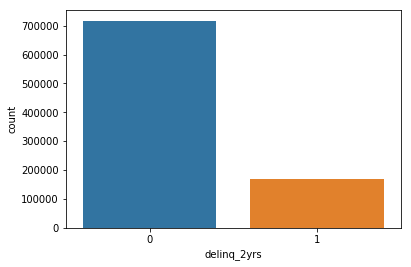

In [110]:
sns.countplot(loan.delinq_2yrs)

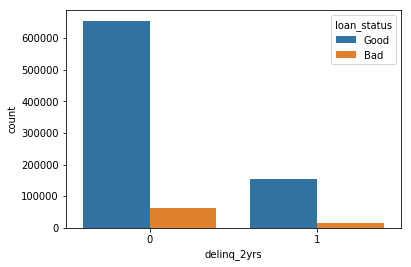

In [112]:
sns.countplot(loan.delinq_2yrs, hue=loan.loan_status)